# Detecting pasta elements in an image: 

In [14]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt #to show the results in the python output

This is the image we have:

In [15]:
image = cv2.imread('pasta_image_or.tif') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR))

[ WARN:0@44.991] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('pasta_image_or.tif'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


We will call them:
- Pasta (Bigger balls)
- Spaguetti (Just spaguetti)
- Grains (small balls)

First of all we convert it to black and white:

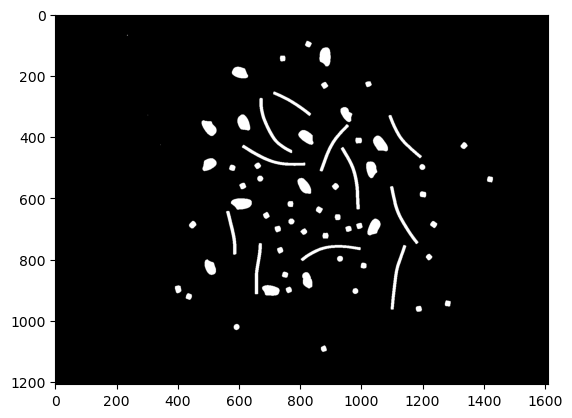

In [ ]:
#apply 
(thresh, blackAndWhiteImage) = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(blackAndWhiteImage, cmap='gray')

## Separating blobs 

We will erode the image with different kernels to select one type of pasta or the other

Erosion to detect pasta:

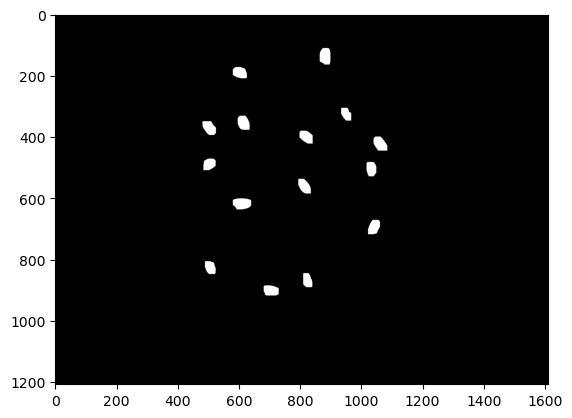

In [ ]:
kernel = np.ones((17, 17), np.uint8)
 
img_erosion = cv2.erode(blackAndWhiteImage, kernel, iterations=1)
pasta = cv2.dilate(img_erosion, kernel)

plt.imshow(cv2.cvtColor(pasta, cv2.COLOR_GRAY2BGR))

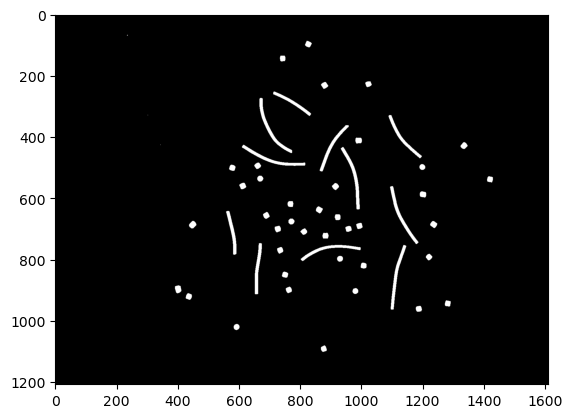

In [ ]:
#We make the detected pasta image blobs a bit bigger in order to substract more cleanly
kernel = np.ones((30, 30), np.uint8)
bigger_pasta = cv2.dilate(pasta, kernel)

#We substract the pasta from the image
sub = cv2.subtract(blackAndWhiteImage,bigger_pasta)
plt.imshow(cv2.cvtColor(sub, cv2.COLOR_GRAY2BGR))

Erosion to detect grains

Now we work with the substracted image, where only spaguetti and grains appear:
We want to get rid of spaguetti

In [ ]:
#create kernel with ellipse shape and size 15x15,so a circle
kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15)) 
kernel_circle

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

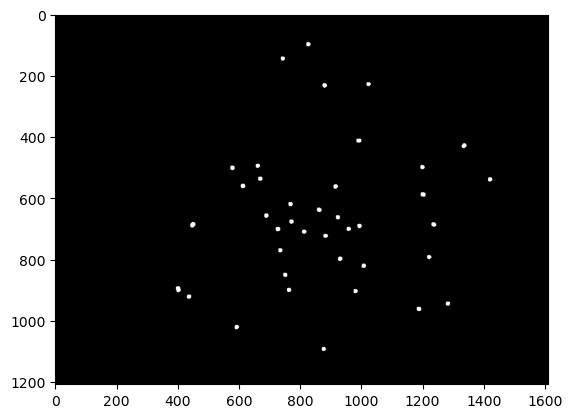

In [ ]:
#erode the image 
grains = cv2.erode(sub, kernel_circle)

#apply another kernel with circle shape but size 10x10
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
grains = cv2.dilate(grains, kernel)

plt.imshow(cv2.cvtColor(grains, cv2.COLOR_GRAY2BGR))
plt.show()

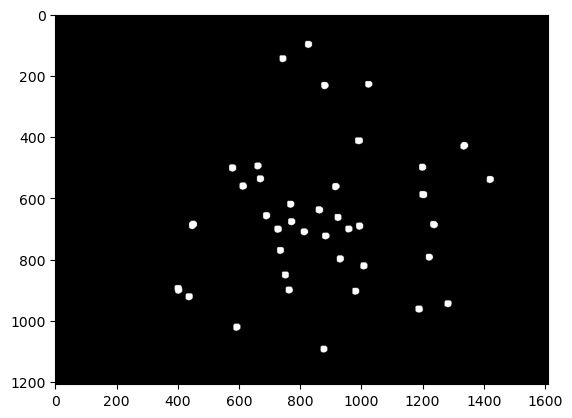

In [ ]:
#dilate with the same kernel to get slightly bigger dots so it substracts more cleanly
to_sub = cv2.dilate(grains, kernel)

plt.imshow(cv2.cvtColor(to_sub, cv2.COLOR_GRAY2BGR))

Substract to isolate spaguetti:

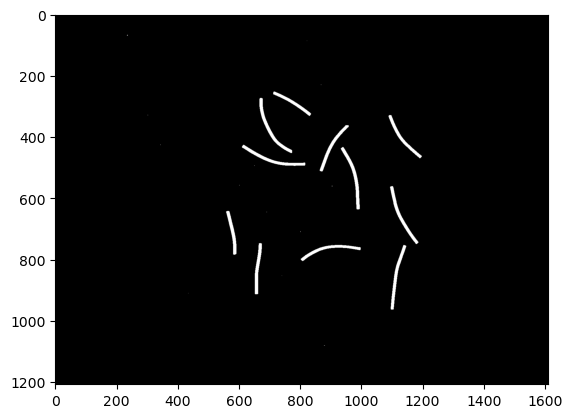

In [ ]:
spaguetti = cv2.subtract(sub, to_sub)
plt.imshow(cv2.cvtColor(spaguetti, cv2.COLOR_GRAY2BGR))

Save obtained images:

In [ ]:
cv2.imwrite("Pasta_images/isolated/pasta.png", pasta)
cv2.imwrite("Pasta_images/isolated/grains.png", grains)
cv2.imwrite("Pasta_images/isolated/spaguetti.png", spaguetti)

True

## Counting number of elements of each type:

In [ ]:
#pasta = cv2.imread("Pasta_images/isolated/pasta.png")
#grains = cv2.imread("Pasta_images/isolated/grains.png")
#spagutti = cv2.imread("Pasta_images/isolated/spaguetti.png")

We will use connected component analysis to detect how many blobs we have in our image

In [ ]:
#example, start with one image, pasta just because
IDS = np.zeros(pasta.shape)
IDS

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#We'll use a 8 connectivity structuring element
se = np.array(
      [[1,1,1],
      [1,0,1],
      [1,1,1]]
)

In [ ]:
import math

In [ ]:
def blob_detection(img,se):
   cnt_label = 1
   IDS = np.zeros(pasta.shape)
   for j,row in enumerate(IDS):
      for i,IDS_pix in enumerate(row):
         if(img[j,i]!=0):
            widw_half_len_x = math.floor(se.shape[0]/2)
            widw_half_len_y = math.floor(se.shape[1]/2)
            ids_window = IDS[j-widw_half_len_x:j+widw_half_len_x+1 , i-widw_half_len_y:i+widw_half_len_y+1]
            neigh = np.multiply(ids_window ,se) #element-wise multiplication
            if(np.sum(neigh)==0):
               IDS[j,i] = cnt_label
               cnt_label += 1
            else:
               IDS[j,i] = int(np.sum(neigh)/(9-len(np.where(neigh==0.)[0]))) #mean value of neigh different than 0
   
   return IDS, cnt_label

In [ ]:
IDS, cnt_label = blob_detection(pasta,se)

In [ ]:
cnt_label

31

LABEL 1: 


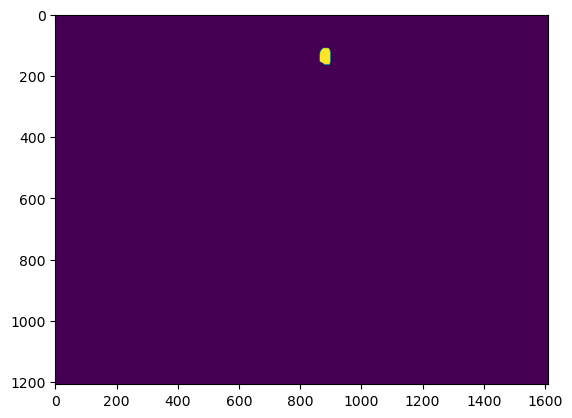

LABEL 2: 


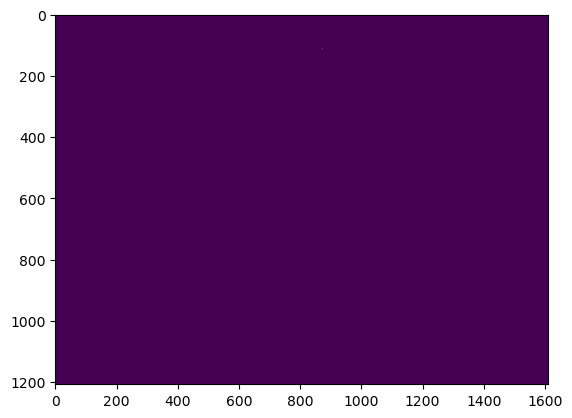

LABEL 3: 


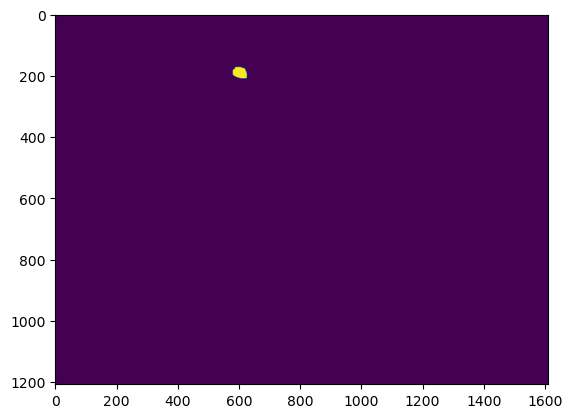

LABEL 4: 


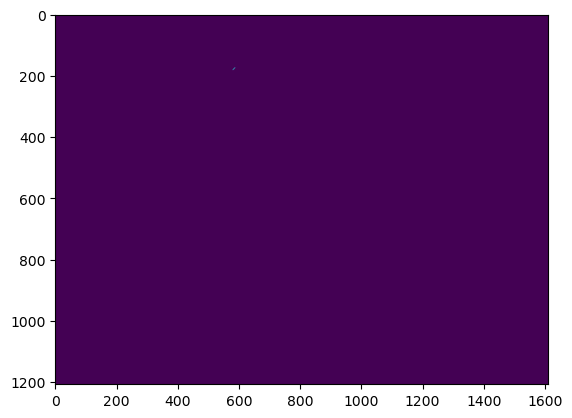

LABEL 5: 


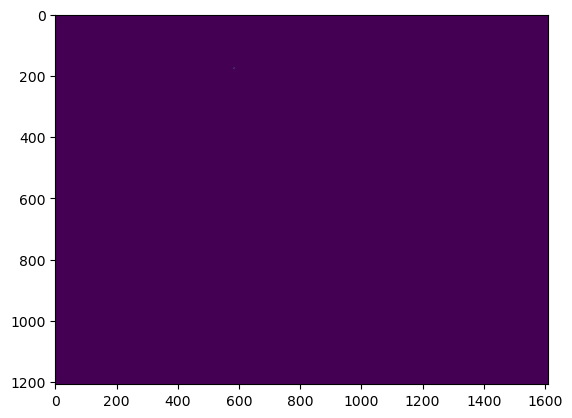

LABEL 6: 


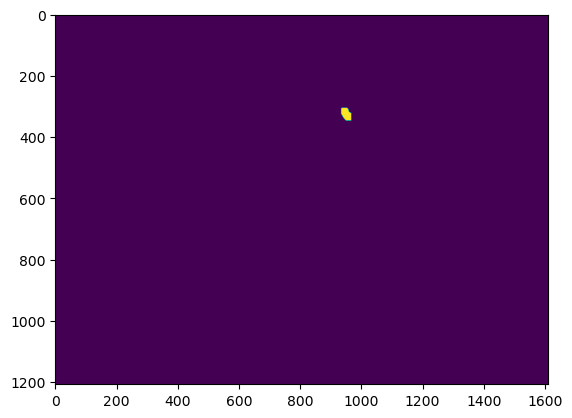

LABEL 7: 


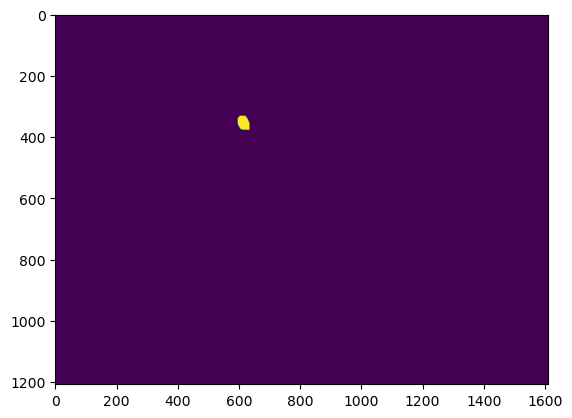

LABEL 8: 


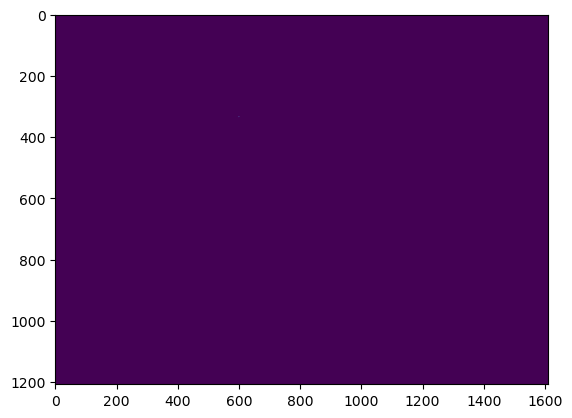

LABEL 9: 


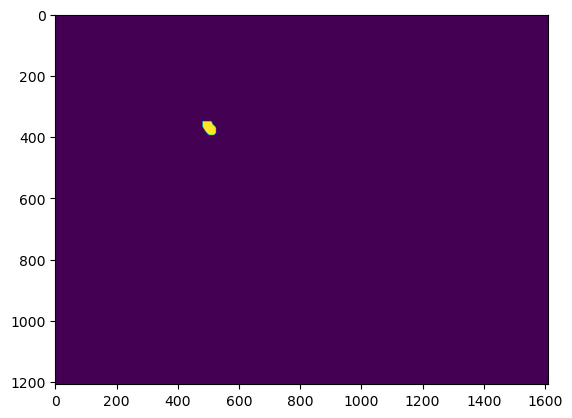

LABEL 10: 


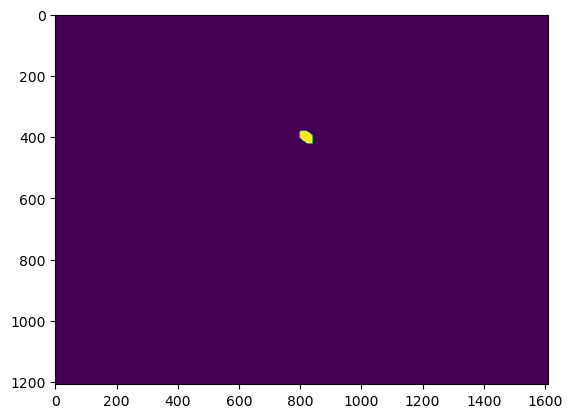

LABEL 11: 


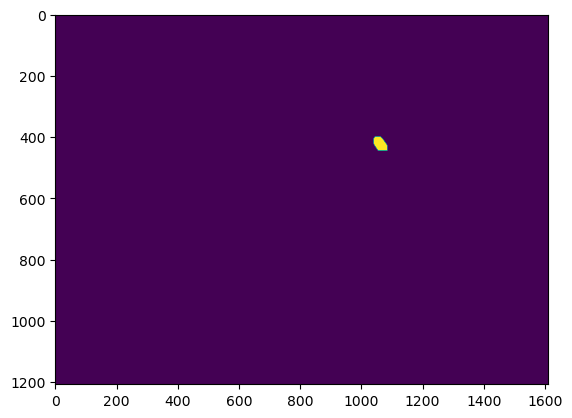

LABEL 12: 


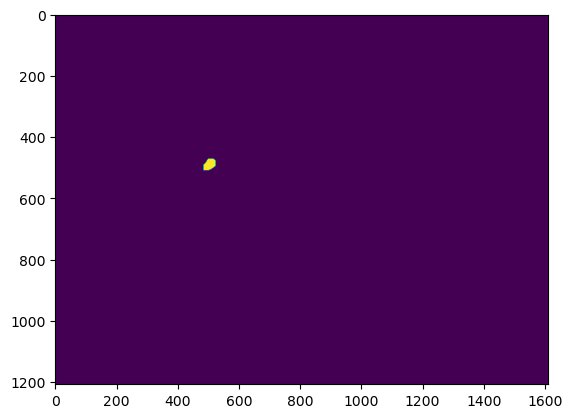

LABEL 13: 


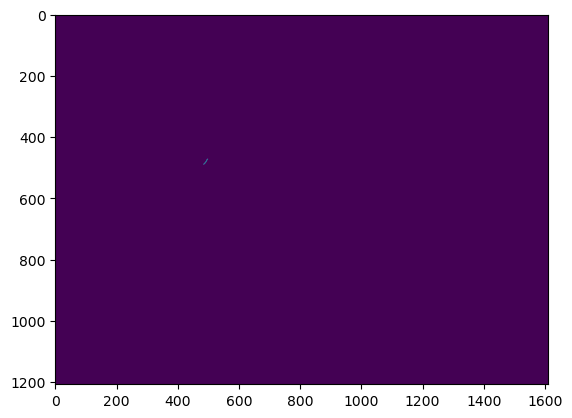

LABEL 14: 


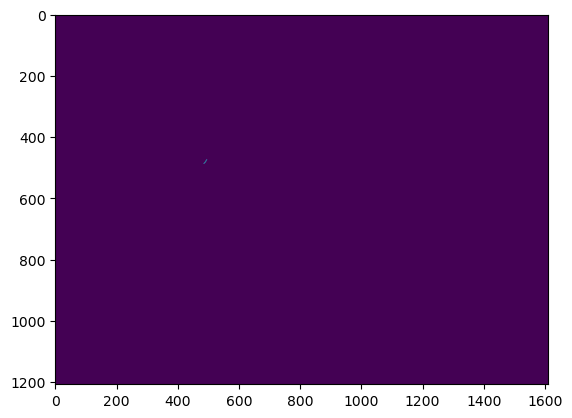

LABEL 15: 


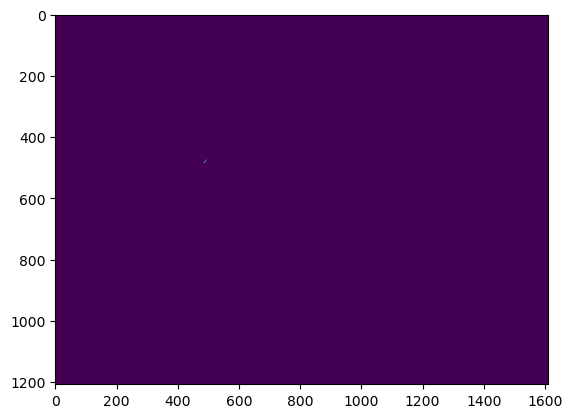

LABEL 16: 


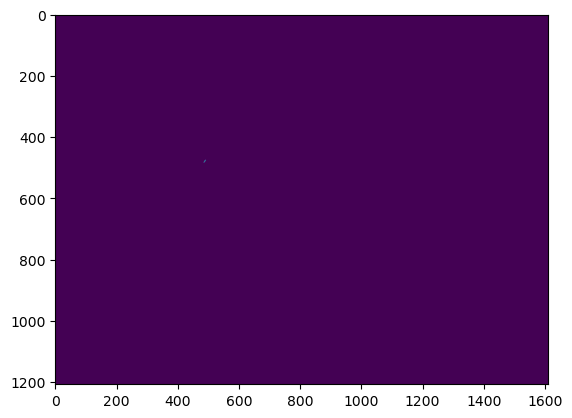

LABEL 17: 


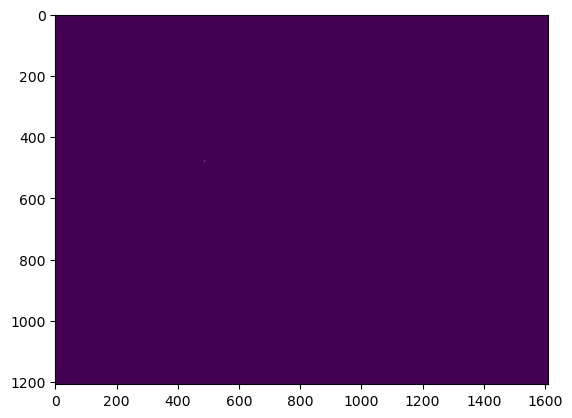

LABEL 18: 


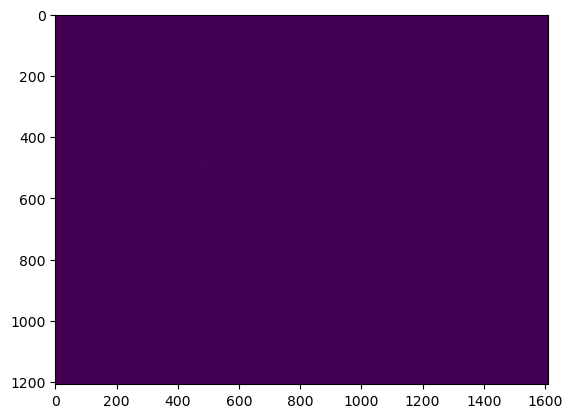

LABEL 19: 


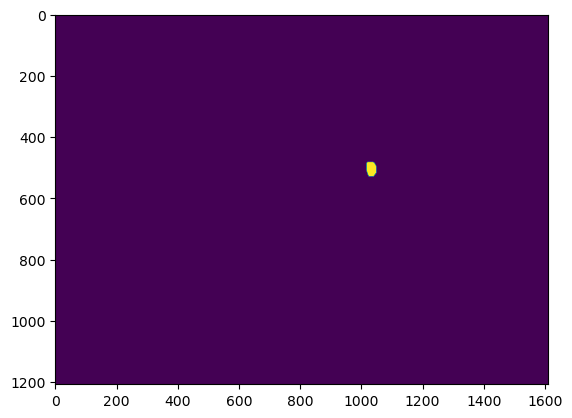

LABEL 20: 


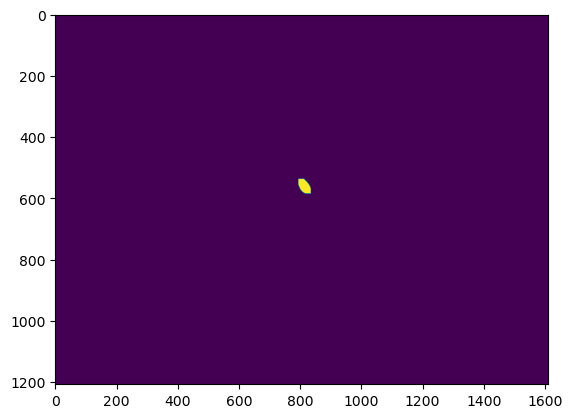

LABEL 21: 


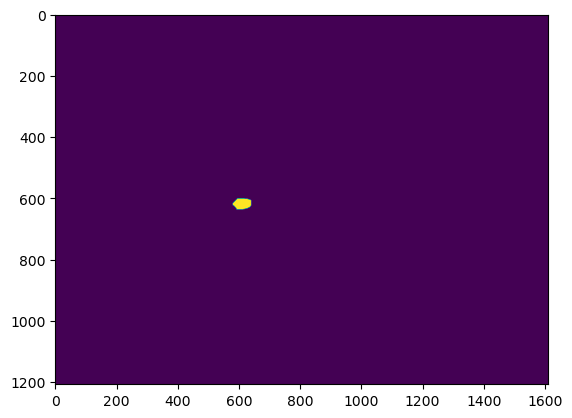

LABEL 22: 


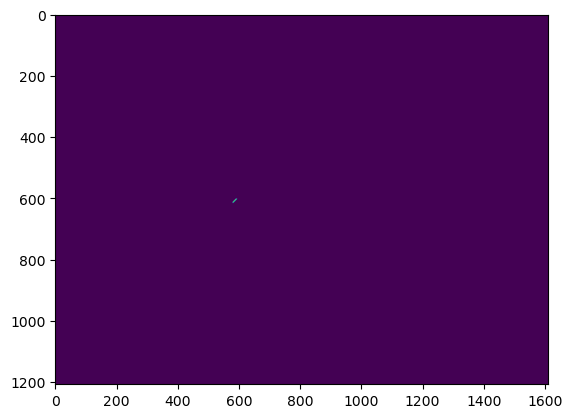

LABEL 23: 


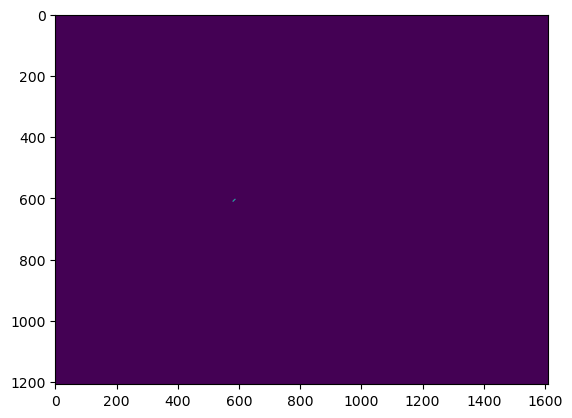

LABEL 24: 


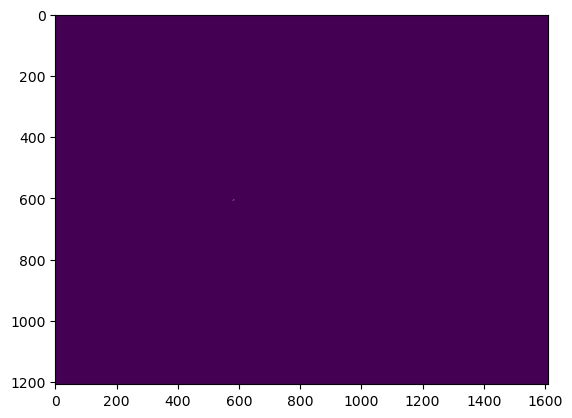

LABEL 25: 


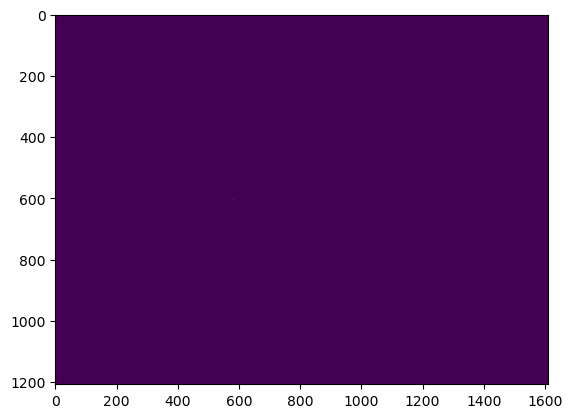

LABEL 26: 


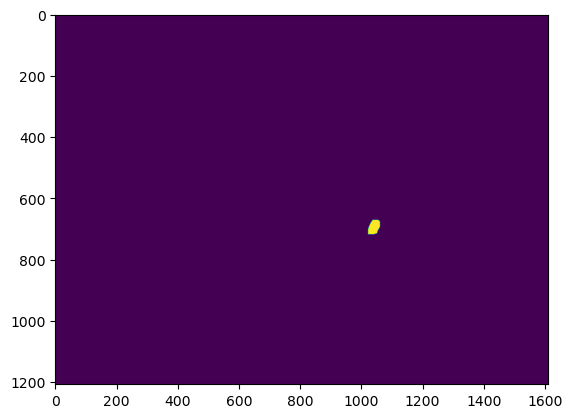

LABEL 27: 


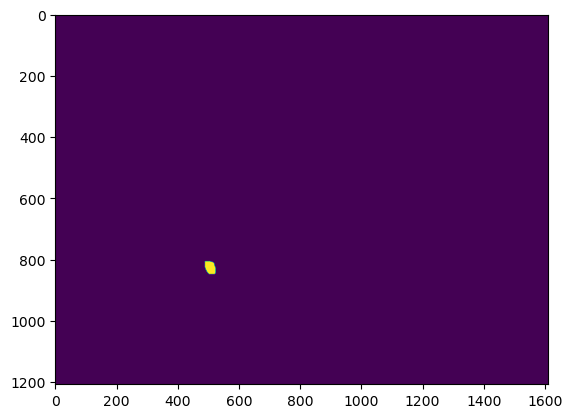

LABEL 28: 


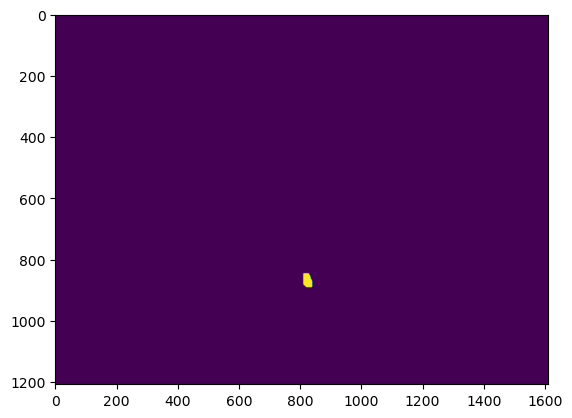

LABEL 29: 


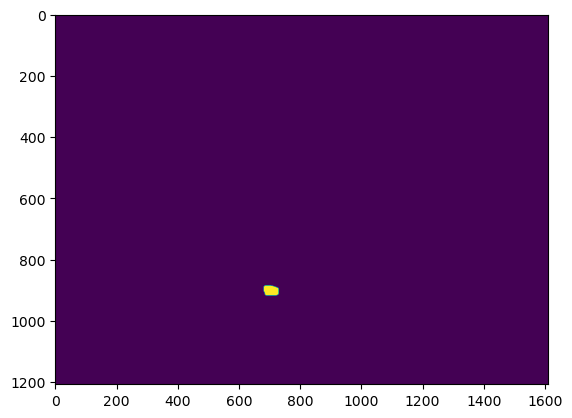

LABEL 30: 


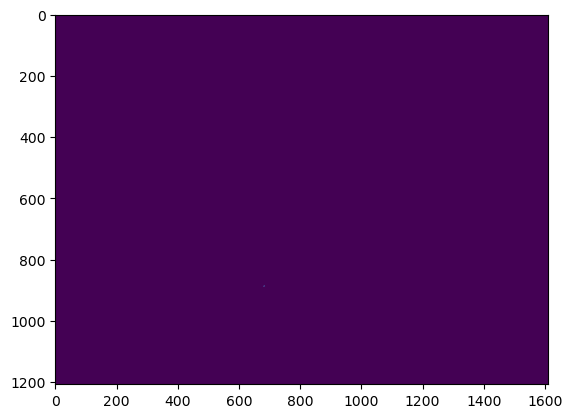

LABEL 31: 


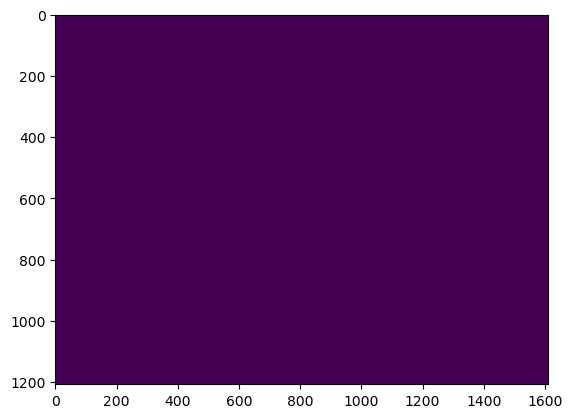

In [ ]:
for i in range(1,cnt_label+1):
    IDS_copy = IDS.copy()
    IDS_copy[np.where(IDS != i)] = 0
    print(f"LABEL {i}: ")
    plt.imshow(IDS_copy)
    plt.show()

Seems to be detecting, small imperfections in the image, we'll gaussian blurr everything and try again

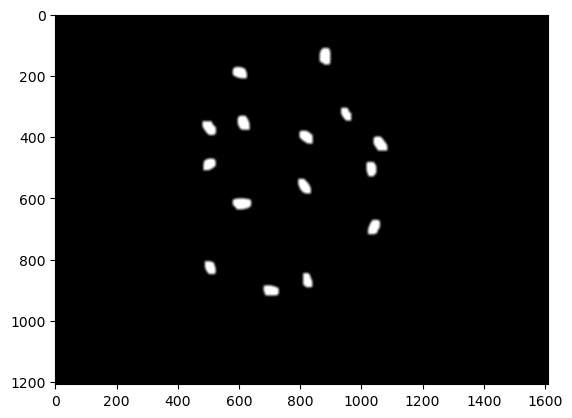

In [ ]:
blurr_pasta = cv2.GaussianBlur(pasta,(11,11),sigmaX=10,borderType=cv2.BORDER_CONSTANT)
plt.imshow(blurr_pasta,cmap="gray")

In [9]:
IDS, cnt_label = blob_detection(blurr_pasta,se)

NameError: name 'blob_detection' is not defined

In [161]:
cnt_label

31

Doesn't improve much, therefore we'll do another approach, area threshold

In [1]:
def area_threshold(IDS,pix_thr):

    IDS_new = np.zeros(IDS.shape) #start a new matrix with all zeors
    cnt_newidx = 1
    for i in range(1,cnt_label+1):
        num_pix = len(np.where(IDS == i)[0]) #count number of pixels in that blob
        if num_pix >= pix_thr: #passed threshold
            IDS_new[np.where(IDS==i)] = cnt_newidx #save to the new matrix interesting blob with new id
            cnt_newidx += 1 #add1 to counter 
    
    ##posterior addition for visualization purposes {
    IDS_colored = np.zeros(IDS.shape) 
    for i in cnt_newidx:
        IDS_colored = cv2.cvtColor(IDS_colored,cv2.COLOR_GRAY2HSV)
    #}
    
    return IDS_new ,cnt_newidx-1 #-1 as the last new id generated when +=1 doens't exist

In [2]:
IDS, cnt_label = area_threshold(IDS,300)

NameError: name 'IDS' is not defined

In [170]:
cnt_label

15

LABEL 1: 


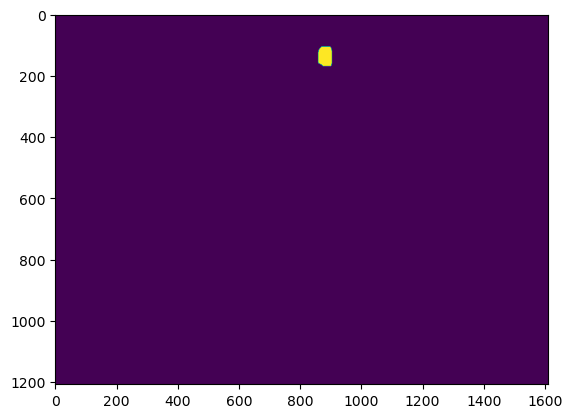

LABEL 2: 


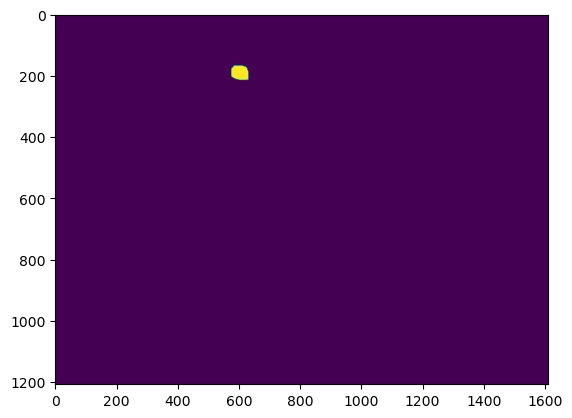

LABEL 3: 


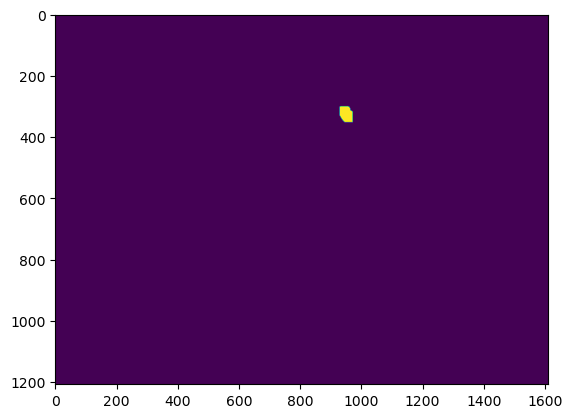

LABEL 4: 


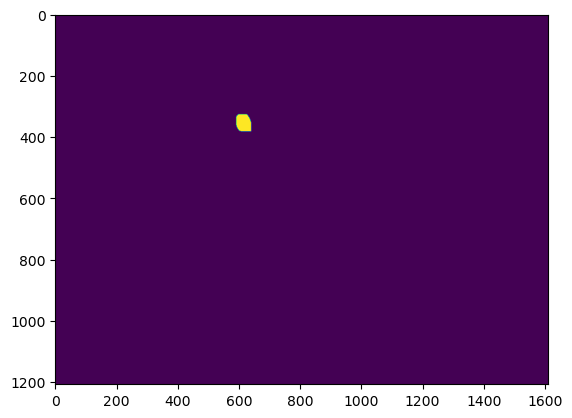

LABEL 5: 


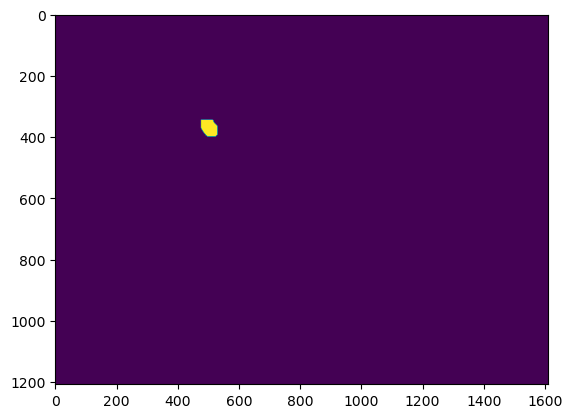

LABEL 6: 


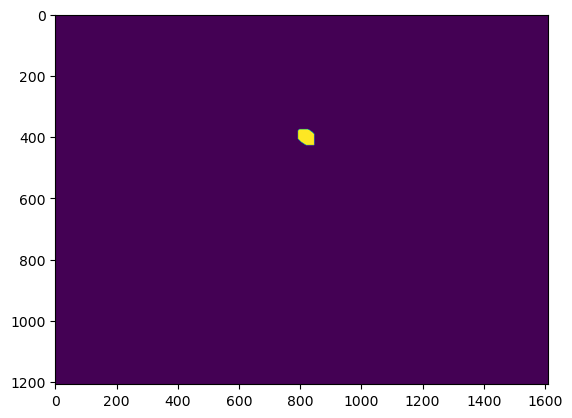

LABEL 7: 


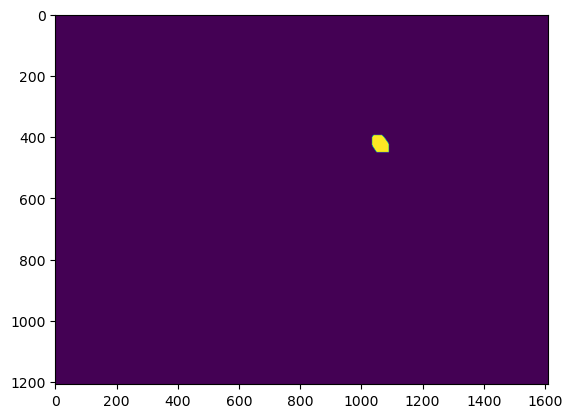

LABEL 8: 


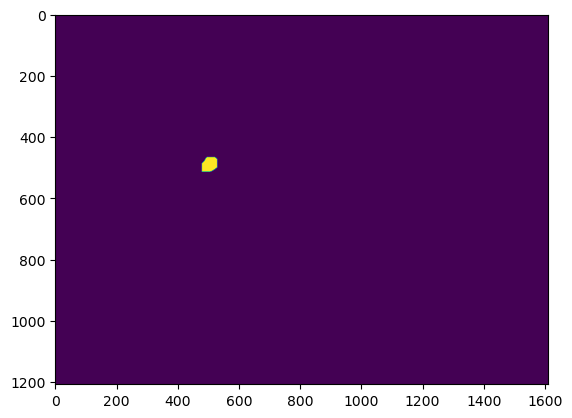

LABEL 9: 


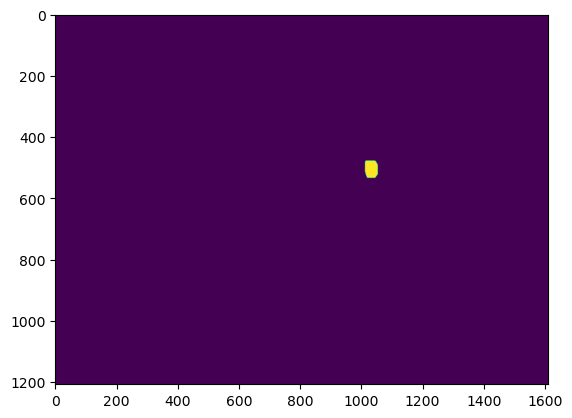

LABEL 10: 


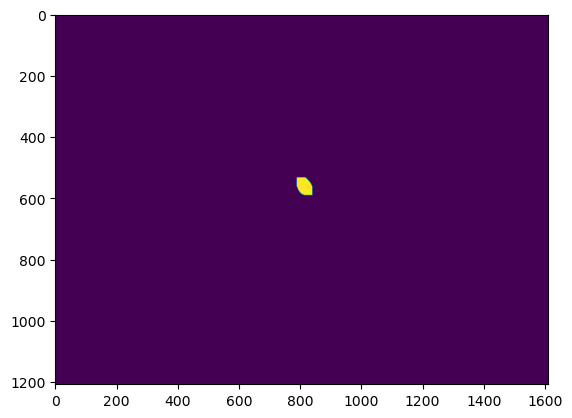

LABEL 11: 


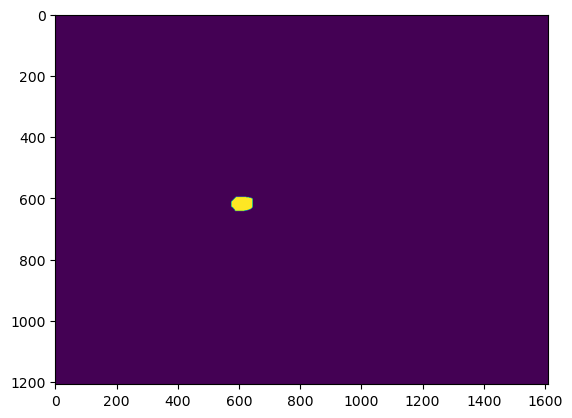

LABEL 12: 


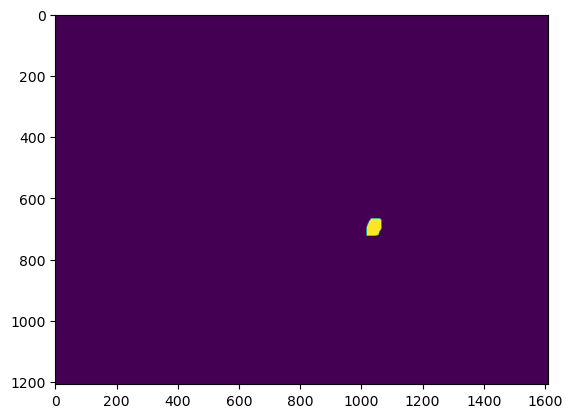

LABEL 13: 


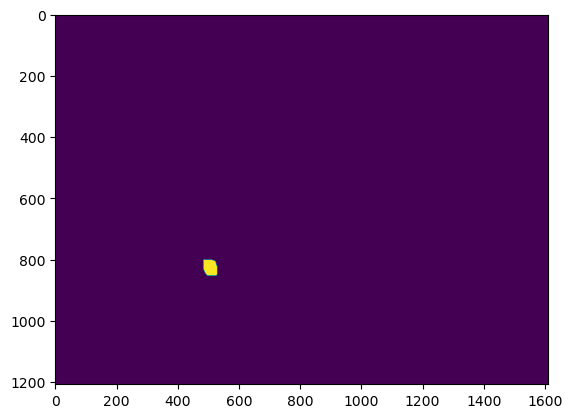

LABEL 14: 


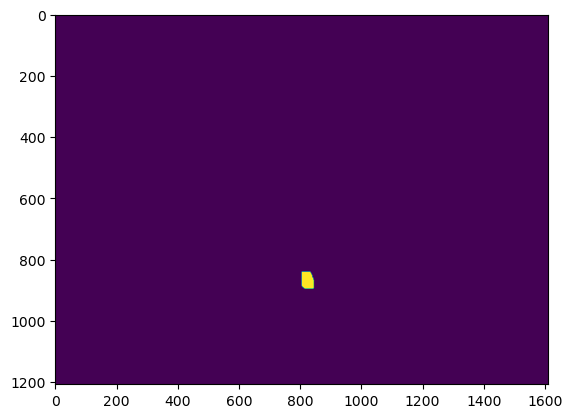

LABEL 15: 


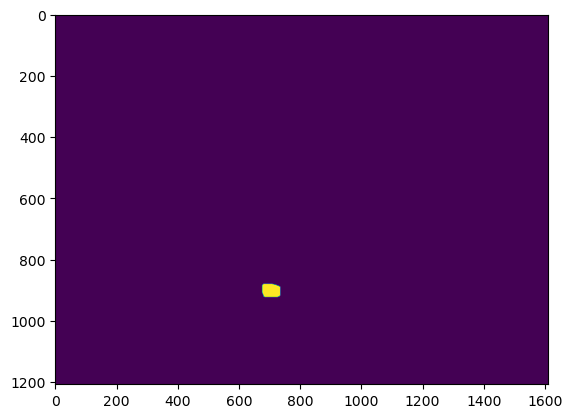

In [171]:
for i in range(1,cnt_label+1):
    IDS_copy = IDS.copy()
    IDS_copy[np.where(IDS != i)] = 0
    print(f"LABEL {i}: ")
    plt.imshow(IDS_copy)
    plt.show()

WORKS LIKE A CHARM :)

Put the original image as reference to check if its working properly

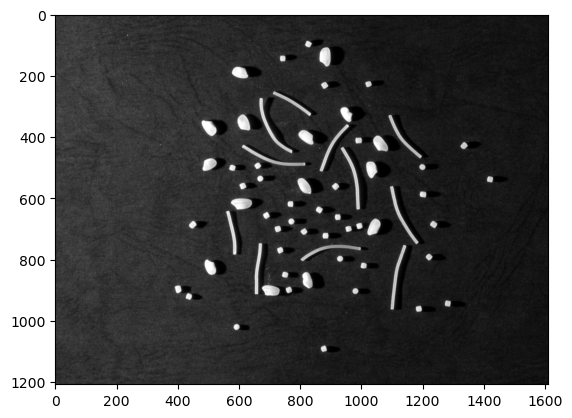

In [184]:
image = cv2.imread('OriginalImage.tif') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR))

In [ ]:
#We'll use a 8 connectivity structuring element
se = np.array(
      [[1,1,1],
      [1,0,1],
      [1,1,1]]
)

In [191]:
#Now go over all images:
images = {"pasta":pasta,"grains":grains,"spaguetti":spaguetti}
THR_pix = 140 #this is a general threshold for all images,
#could achive better results with a more general thr 
# if it was more or less adjusted to each image

for key in images:
    IDS, cnt_label = blob_detection(images[key],se)
    IDS, cnt_label = area_threshold(IDS,THR_pix)
    print(f"detected {cnt_label} {key} objects in image ")
    

detected 15 pasta objects in image 
detected 39 grains objects in image 
detected 11 spaguetti objects in image 


Problems we had:

- Detection of grains failed -> Very close grains were considered as only 1. We fixed it by doing a lower dilation in the segmentation step.